<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/Full_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pycaret
!pip install markupsafe==2.0.1
!pip install explainerdashboard
!pip install shap
!pip install autoviz
!pip install fairlearn
!pip install deepchecks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
import pycaret
import jinja2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pycaret.classification import *

In [3]:
from pycaret.datasets import get_data
boston = get_data('boston')
from pycaret.regression import *
exp_name = setup(data = boston,  target = 'medv')

Description             Value
0                               session_id              7946
1                                   Target              medv
2                            Original Data         (506, 14)
3                           Missing Values             False
4                         Numeric Features                11
5                     Categorical Features                 2
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set         (354, 21)
10                    Transformed Test Set         (152, 21)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              5b2e
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [4]:
best_model = compare_models()

Model     MAE      MSE    RMSE      R2  \
gbr           Gradient Boosting Regressor  2.2091   9.2560  2.9875  0.8946   
et                  Extra Trees Regressor  2.1862  10.1523  3.1442  0.8794   
rf                Random Forest Regressor  2.3043  10.8456  3.2482  0.8726   
lightgbm  Light Gradient Boosting Machine  2.4056  12.4030  3.4594  0.8556   
ada                    AdaBoost Regressor  2.6762  12.9062  3.5340  0.8522   
dt                Decision Tree Regressor  3.2245  22.4103  4.6111  0.7429   
lr                      Linear Regression  3.6289  26.7705  5.1151  0.6884   
ridge                    Ridge Regression  3.6080  27.0162  5.1284  0.6876   
lar                Least Angle Regression  3.6363  26.8344  5.1220  0.6876   
br                         Bayesian Ridge  3.6563  28.1437  5.2191  0.6791   
en                            Elastic Net  3.9681  32.8023  5.6341  0.6316   
lasso                    Lasso Regression  4.0107  33.4515  5.6953  0.6233   
huber                     Huber Regressor  3.6843  33.1972  5.6376  0.6206   
omp           Orthogonal Matching Pursuit  4.3497  37.4196  6.0523  0.5651   
knn                 K Neighbors Regressor  4.9446  51.8790  7.1507  0.3837   
par          Passive Aggressive Regressor  6.4448  77.2095  8.7554  0.0940   
llar         Lasso Least Angle Regression  6.8360  89.7457  9.4215 -0.0363   
dummy                     Dummy Regressor  6.8360  89.7457  9.4215 -0.0363   

           RMSLE    MAPE  TT (Sec)  
gbr       0.1362  0.1099     0.092  
et        0.1360  0.1066     0.451  
rf        0.1457  0.1156     0.517  
lightgbm  0.1483  0.1157     0.064  
ada       0.1707  0.1430     0.092  
dt        0.2100  0.1643     0.017  
lr        0.2493  0.1795     0.328  
ridge     0.2625  0.1791     0.011  
lar       0.2498  0.1800     0.015  
br        0.2708  0.1819     0.012  
en        0.2834  0.1880     0.012  
lasso     0.2894  0.1891     0.013  
huber     0.2971  0.1776     0.038  
omp       0.3114  0.2087     0.011  
knn       0.2715  0.2301     0.061  
par       0.4582  0.3278     0.012  
llar      0.3981  0.3717     0.011  
dummy     0.3981  0.3717     0.010

In [6]:
best = create_model('gbr')

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     1.7912   5.1396  2.2671  0.9419  0.1333  0.1088
1     2.0279   8.0529  2.8378  0.8982  0.1259  0.0966
2     1.6953   5.9319  2.4356  0.8877  0.1002  0.0725
3     2.5192  11.0633  3.3262  0.8733  0.1582  0.1241
4     2.7531  14.2357  3.7730  0.8607  0.1535  0.1278
5     2.4776  10.3023  3.2097  0.8819  0.1563  0.1311
6     2.0191   5.9444  2.4381  0.9077  0.1373  0.1195
7     1.5073   5.3193  2.3064  0.9375  0.0849  0.0675
8     2.7030  11.9906  3.4627  0.8964  0.1444  0.1339
9     2.5975  14.5801  3.8184  0.8602  0.1677  0.1173
Mean  2.2091   9.2560  2.9875  0.8946  0.1362  0.1099
Std   0.4312   3.4769  0.5753  0.0269  0.0251  0.0225

In [7]:
tuned_best = tune_model(best)

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     1.6511   4.6293  2.1516  0.9477  0.1380  0.1100
1     2.3026   8.3176  2.8840  0.8949  0.1338  0.1082
2     2.2523  10.4288  3.2294  0.8026  0.1243  0.0920
3     2.5161  11.7040  3.4211  0.8660  0.1680  0.1235
4     2.5056  15.0715  3.8822  0.8526  0.1390  0.1079
5     2.1990   9.7455  3.1218  0.8883  0.1569  0.1209
6     1.8673   6.0673  2.4632  0.9058  0.1371  0.1153
7     1.4605   3.4405  1.8549  0.9596  0.0894  0.0686
8     2.2647   9.6208  3.1017  0.9169  0.1217  0.1049
9     2.6212  14.2084  3.7694  0.8638  0.1696  0.1255
Mean  2.1640   9.3234  2.9879  0.8898  0.1378  0.1077
Std   0.3653   3.6375  0.6290  0.0441  0.0226  0.0161

In [8]:
bagged_tuned_best = ensemble_model(tuned_best, method = 'Bagging')

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     1.9725   6.7182  2.5920  0.9241  0.1593  0.1291
1     2.1397   7.2475  2.6921  0.9084  0.1187  0.1001
2     1.9867   8.8397  2.9732  0.8327  0.1215  0.0858
3     2.3900  10.7280  3.2754  0.8772  0.1444  0.1163
4     2.4482  13.5338  3.6788  0.8676  0.1332  0.1055
5     2.1178   9.0714  3.0119  0.8960  0.1599  0.1208
6     2.0708   8.5736  2.9281  0.8669  0.1434  0.1208
7     1.9452  15.5601  3.9446  0.8171  0.1238  0.0813
8     2.1472   9.3718  3.0613  0.9190  0.1463  0.1174
9     2.5048  13.8929  3.7273  0.8668  0.1683  0.1171
Mean  2.1723  10.3537  3.1885  0.8776  0.1419  0.1094
Std   0.1936   2.8429  0.4329  0.0334  0.0165  0.0151

In [9]:
top3 = compare_models(n_select = 3)
blender = blend_models(top3)

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     1.7788   4.9666  2.2286  0.9439  0.1391  0.1140
1     2.1840   7.7711  2.7877  0.9018  0.1195  0.1013
2     1.9071   7.6504  2.7659  0.8552  0.1129  0.0813
3     2.4225  11.5780  3.4026  0.8674  0.1501  0.1158
4     2.4056  13.9524  3.7353  0.8635  0.1273  0.1005
5     2.2662   9.4147  3.0683  0.8921  0.1546  0.1226
6     2.0981   6.9181  2.6302  0.8926  0.1418  0.1236
7     1.5934   6.5202  2.5535  0.9233  0.0858  0.0685
8     2.2815   8.9723  2.9954  0.9225  0.1393  0.1216
9     2.4954  13.8875  3.7266  0.8668  0.1649  0.1148
Mean  2.1433   9.1631  2.9894  0.8929  0.1335  0.1064
Std   0.2828   2.9163  0.4760  0.0284  0.0219  0.0177

In [10]:
stacker = stack_models(top3)

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     1.7877   4.9751  2.2305  0.9438  0.1362  0.1100
1     2.1100   7.8505  2.8019  0.9008  0.1318  0.1045
2     1.8899   9.0539  3.0090  0.8287  0.1281  0.0813
3     2.2373   9.9929  3.1612  0.8856  0.1361  0.1051
4     2.6232  14.4086  3.7959  0.8590  0.1394  0.1173
5     2.2187   8.7647  2.9605  0.8995  0.1461  0.1173
6     1.8193   6.1409  2.4781  0.9047  0.1251  0.0999
7     1.7924   7.9821  2.8253  0.9062  0.1000  0.0804
8     2.5157   9.4188  3.0690  0.9186  0.1660  0.1249
9     2.5589  12.5662  3.5449  0.8795  0.1570  0.1135
Mean  2.1553   9.1154  2.9876  0.8926  0.1366  0.1054
Std   0.3122   2.6417  0.4354  0.0303  0.0172  0.0141

In [16]:
gbr = create_model('gbr')
plot_model(gbr, plot = 'residuals_interactive')

In [17]:
evaluate_model(gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
dt = create_model('dt')

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     2.9528  17.2764  4.1565  0.8048  0.2266  0.2000
1     2.8556  15.3511  3.9180  0.8060  0.1688  0.1307
2     2.5611  22.2589  4.7179  0.5788  0.1825  0.0956
3     3.3639  22.2508  4.7171  0.7452  0.2111  0.1513
4     2.8457  19.7440  4.4434  0.8069  0.1680  0.1326
5     3.9743  24.4009  4.9397  0.7203  0.2222  0.2000
6     2.6629  12.6423  3.5556  0.8037  0.2072  0.1768
7     2.5057  10.3220  3.2128  0.8786  0.1715  0.1306
8     5.2229  53.4549  7.3113  0.5382  0.3159  0.2786
9     3.3000  26.4014  5.1382  0.7468  0.2258  0.1469
Mean  3.2245  22.4103  4.6111  0.7429  0.2100  0.1643
Std   0.7878  11.4392  1.0716  0.1017  0.0419  0.0492

In [31]:
interpret_model(dt, 'reason')

In [32]:
final_lr = finalize_model(dt)

In [33]:
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]
blender = blend_models(tuned_top3)
stacker = stack_models(tuned_top3)
best_mae_model = automl(optimize = 'MAE')

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     1.8396   5.9111  2.4313  0.9332  0.1487  0.1163
1     2.3029   8.5999  2.9326  0.8913  0.1433  0.1116
2     1.9850   9.0816  3.0136  0.8281  0.1206  0.0833
3     2.1927   9.4058  3.0669  0.8923  0.1479  0.1099
4     2.7647  17.1659  4.1432  0.8321  0.1470  0.1195
5     2.1186   8.5245  2.9197  0.9023  0.1466  0.1155
6     1.8196   6.2128  2.4926  0.9036  0.1287  0.1034
7     1.9160  10.2818  3.2065  0.8791  0.1043  0.0822
8     2.5925  10.9116  3.3033  0.9057  0.2542  0.1333
9     2.6079  13.3161  3.6491  0.8723  0.1582  0.1160
Mean  2.2140   9.9411  3.1159  0.8840  0.1500  0.1091
Std   0.3250   3.1562  0.4822  0.0312  0.0380  0.0150

In [36]:
from pycaret.regression import get_leaderboard
leaderboard = get_leaderboard()

In [5]:
gbr = create_model('gbr')

MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     1.7477   5.1065  2.2598  0.9260  0.1094  0.0889
1     2.4527  11.0350  3.3219  0.8704  0.1755  0.1417
2     2.6946  12.2259  3.4966  0.8580  0.1685  0.1344
3     2.7997  19.5963  4.4268  0.8068  0.1822  0.1346
4     2.1016   7.1498  2.6739  0.8876  0.1419  0.1145
5     2.3290  12.0725  3.4745  0.8317  0.1153  0.0878
6     2.4906  17.8642  4.2266  0.6604  0.1753  0.1387
7     2.5742  11.5686  3.4013  0.9172  0.1286  0.1017
8     2.1549   7.0178  2.6491  0.9481  0.1609  0.1325
9     1.9844   7.2554  2.6936  0.8859  0.1230  0.1015
Mean  2.3329  11.0892  3.2624  0.8592  0.1481  0.1176
Std   0.3155   4.5094  0.6678  0.0777  0.0262  0.0201

In [6]:
dashboard(gbr)

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashb

<IPython.core.display.Javascript object>

In [6]:
eda(display_format = 'bokeh')
%matplotlib inline

Shape of your Data Set loaded: (506, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################
Not able to read or load file. Please check your inputs and try again...


MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     3.8156  22.4170  4.7347  0.7981  0.2604  0.2284
1     3.3807  20.2751  4.5028  0.7491  0.1908  0.1550
2     3.5173  22.0118  4.6917  0.7730  0.2767  0.2065
3     3.7762  34.1514  5.8439  0.5275  0.2056  0.1582
4     3.7845  26.2157  5.1201  0.7391  0.4719  0.1632
5     2.9130  15.6990  3.9622  0.7132  0.1584  0.1342
6     2.9732  18.1166  4.2564  0.7008  0.2612  0.1857
7     3.5422  22.3208  4.7245  0.6601  0.2219  0.1752
8     2.9436  15.8170  3.9771  0.8205  0.2206  0.1573
9     3.1269  26.1858  5.1172  0.7875  0.2079  0.1570
Mean  3.3773  22.3210  4.6930  0.7269  0.2475  0.1721
Std   0.3455   5.2743  0.5444  0.0809  0.0821  0.0264

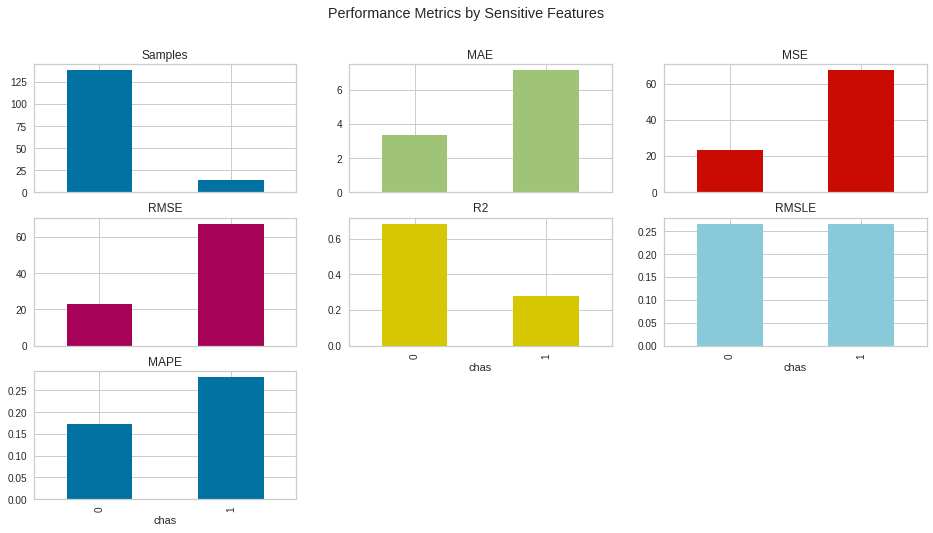

In [5]:
lr = create_model('lr')
lr_fairness = check_fairness(lr, sensitive_features = ['chas'])

In [12]:
create_app(lr)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://57910.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7fd8cb2ca750>,
 'http://127.0.0.1:7860/',
 'https://57910.gradio.app')

In [6]:
deep_check(lr)

/usr/local/lib/python3.7/dist-packages/deepchecks/__init__.py:127: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead

/usr/local/lib/python3.7/dist-packages/deepchecks/suites.py:24: DeprecationWarning:

Ability to import tabular suites from the `deepchecks.suites` is deprecated, please import from `deepchecks.tabular.suites` instead



Full Suite:   0%|          | 0/36 [00:00<?, ? Check/s]

Calculating permutation feature importance. Expected to finish in 2 seconds


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2022 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Full Suite 
 
 
 
 
 

<!-- Load require.js. Delete this if your page already loads require.js -->